# End-to-End Automatic License Plate Detection and Recognition

In [1]:
# import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
from utilities.end_to_end_utilities import *

Using TensorFlow backend.


# Load the networks and weights

## Load the weights from our best YOLO model

In [2]:
# Get yolo model
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
yolo_model = get_yolo_model()

try:
    yolo_model.load_weights("./weights/all_cars_weights_10222018.h5")
    print("YOLO weights successfully loaded.")
except:
    raise Exception("No weight file found!")

Instructions for updating:
Colocations handled automatically by placer.
YOLO model successfully configured.
YOLO weights successfully loaded.


## and load the OCR model using the model specs and the weights

In [3]:
# Get CRNN model
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
keras_ocr_model = get_model_grul4(training=False)

# and load the weights
try:
    keras_ocr_model.load_weights('./weights/GRU20--30--2.958.hdf5')
    print("OCR weights loaded successfully.")
except:
    raise Exception("No weight file found!")

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
OCR model successfully configured.
OCR weights loaded successfully.


## Validation images
Read in the validation images for testing

In [4]:
### configure the validation set directory
all_images_folder = os.getcwd() + '/validation_images/'

all_images = [f for f in listdir(all_images_folder) if isfile(join(all_images_folder, f))]
print(len(all_images)) # currently have 100 images in our validation set

100


### Familiarize yourself with the image names and naming convention
All files have been named as the label, with the license plate characters and a `-STATE CODE` as the postfix; this was done to show the distribution of states that we collected in our training, testing, and validation sets and is explained more in the corresponding research paper. All images are saved as `.jpg` files for consistency.

In [5]:
 # 0 through 99
all_images[1]

'046WGK-NM.jpg'

In [6]:
all_images[2]

'099QHO-CO.jpg'

In [7]:
all_images[3]

'127RFS-CT.jpg'

## Call the `get_lp` function we've defined
Now that we've loaded in the yolo model and the OCR model, we're ready to apply to our validation images to see the results

Predicted: 271QW0  /  True: 271QWO


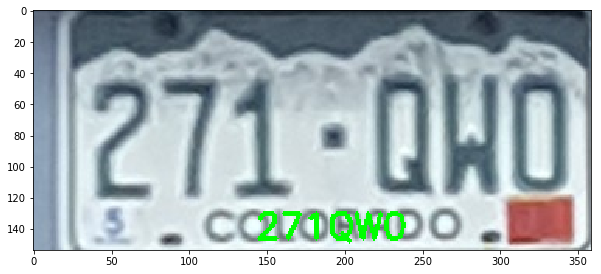

In [8]:
validation_image_index = 9
get_lp(input_image_filename=all_images[validation_image_index], 
       input_image_folder=all_images_folder,
       yolo_model=yolo_model,
       keras_ocr_model=keras_ocr_model)

Notice how the OCR model cannot always accurately distinguish between 0 ad O. We arguably could have labeled this with the 0 as well, indicating it's not easy to distinguish between 0 and O for humans.

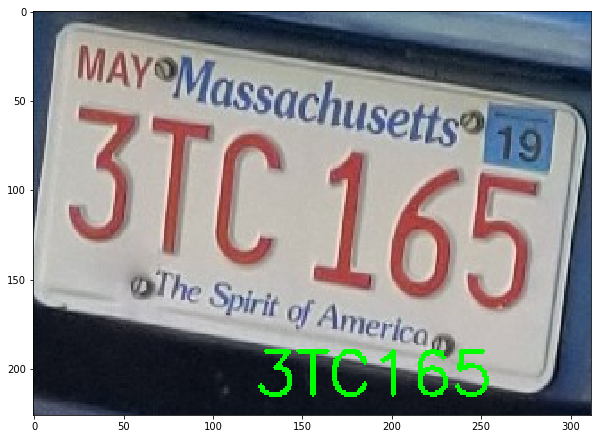

In [9]:
validation_image_index = 13
get_lp(input_image_filename=all_images[validation_image_index], 
       input_image_folder=all_images_folder,
       yolo_model=yolo_model,
       keras_ocr_model=keras_ocr_model)